In [1]:
#Importing all the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
#To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [85]:
#Reading the CSV file
df = pd.read_csv("data.csv")

In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [4]:
df_1=df[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated'
       ]]

In [5]:
df_1

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1955,2005
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,1921,0
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1966,0
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1963,0
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1954,1979
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1983,2009
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,2009,0
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1974,0


In [6]:
df_1['floors'].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [7]:
#To check the type of data present in the csv file
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
#To create a new column
#We are splitting the data in the date column to retrieve the year
df['list_year']=df['date'].str.split(pat='-',expand=True)[0]
#Converting the data to integer type, as date was stored as string
df['list_year']=df['list_year'].astype(int)
#Creating the new column
df['latest_year']=df['list_year']-df['yr_renovated']

In [10]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,list_year,latest_year
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,9
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,2014,2014


In [11]:
df['floors'].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [12]:
df[df['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,list_year,latest_year
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA,2014,5
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA,2014,5


In [13]:
df['bathrooms'].unique(),df['bedrooms'].unique()

(array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
        4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
        5.5 , 6.25, 0.  , 6.75]),
 array([3., 5., 4., 2., 6., 7., 9., 1., 8., 0.]))

In [14]:
#Descibing the data in the column 'latest_year' and finding unique values in the same
df['latest_year'].describe(),df['latest_year'].unique()

(count    4600.000000
 mean     1205.391739
 std       979.414536
 min         0.000000
 25%        15.000000
 50%      2014.000000
 75%      2014.000000
 max      2014.000000
 Name: latest_year, dtype: float64,
 array([   9, 2014,   22,   20,    4,   26,    5,   45,   14,   35,   25,
           0,   15,   11,   31,   17,  102,   91,   60,    3,   13,    1,
           8,   42,   29,   16,   10,   56,    6,   44,   32,   28,   18,
          12,   43,   24,   58,   69,   30,    2,   21,    7,   33,   40,
          51,   46,   19,   80,   61,   48,   59,   27,   54,   36,   34,
          66,   23,  101,   37,   39], dtype=int64))

In [15]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'list_year', 'latest_year'],
      dtype='object')

In [16]:
A=df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'list_year', 'latest_year']]

<AxesSubplot:>

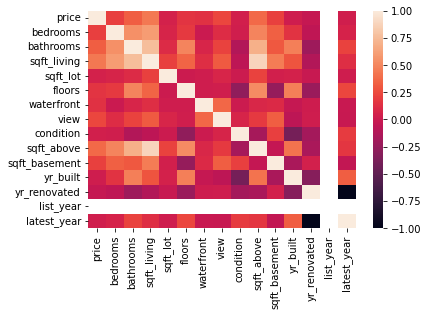

In [17]:
#To get a correlation matrix, in the form of a heatmap. The bar at the right-most side is the legend for the colors being used in the heatmap
sns.heatmap(A.corr())

In [18]:
#Columns
df.columns,len(df.columns)

(Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
        'floors', 'waterfront', 'view', 'condition', 'sqft_above',
        'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
        'statezip', 'country', 'list_year', 'latest_year'],
       dtype='object'),
 20)

In [19]:
#To check if any null values are present in the data
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
list_year        0
latest_year      0
dtype: int64

In [20]:
df.shape

(4600, 20)

In [21]:
#Gives us a description of the entire data
#include='all' includes all the columns in the data-set, including string type columns 
df.describe(include='all')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,list_year,latest_year
count,4600,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600,4600,4600,4600,4600.0,4600.000000
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4525,44,77,1,NaN,NaN
top,2014-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2520 Mulberry Walk NE,Seattle,WA 98103,USA,NaN,NaN
freq,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1573,148,4600,NaN,NaN
mean,NaN,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,NaN,NaN,NaN,NaN,2014.0,1205.391739
std,NaN,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,NaN,NaN,NaN,NaN,0.0,979.414536
min,NaN,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,NaN,NaN,NaN,NaN,2014.0,0.000000
25%,NaN,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,NaN,NaN,NaN,NaN,2014.0,15.000000
50%,NaN,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,2014.0,2014.000000
75%,NaN,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,NaN,NaN,NaN,NaN,2014.0,2014.000000


In [22]:
# pdf = norm.pdf(df['bathrooms'], loc = 2.160815, scale = 0.783781)
# data = df['bedrooms']
# pdf1 = np.array(pdf)
# data1 = np.array(data)
# pdf1,data1
# sns.set_style('whitegrid')
# sns.lineplot(x=data1,y=pdf1)

In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


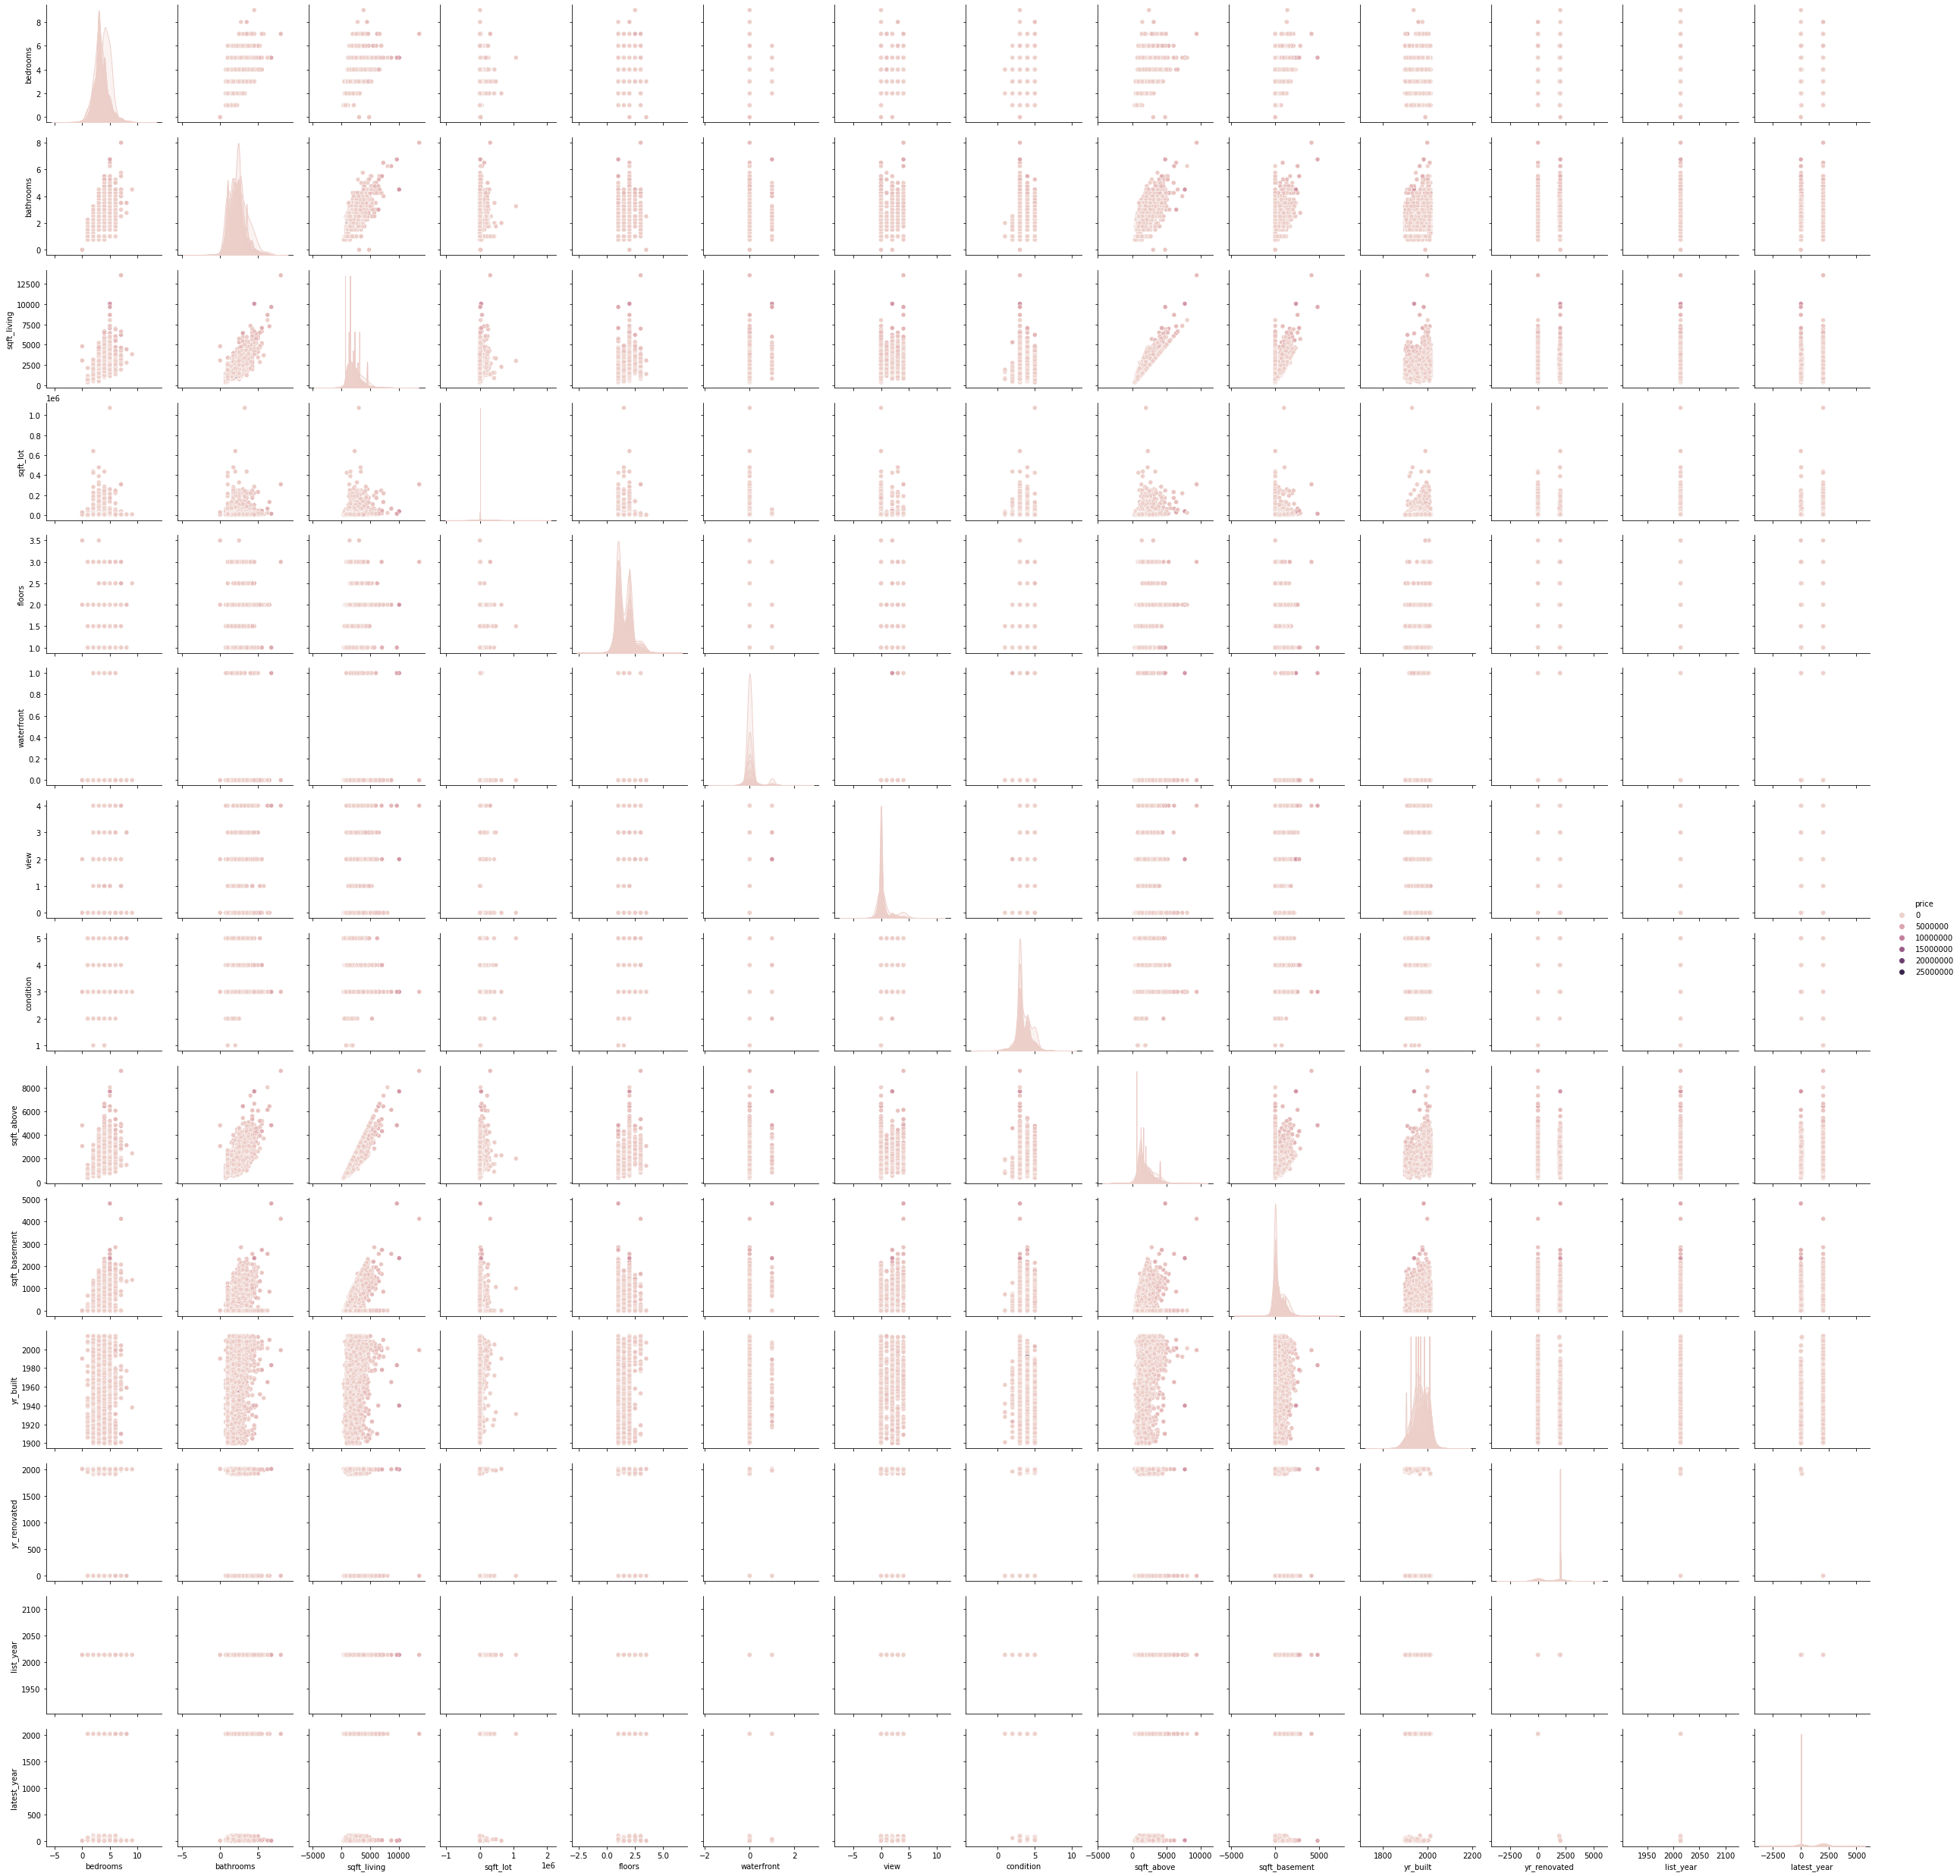

In [24]:
#Gives us plots of all the numerical columns in the data-set
sns.pairplot(data=df,hue='price')

In [25]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'list_year', 'latest_year'],
      dtype='object')

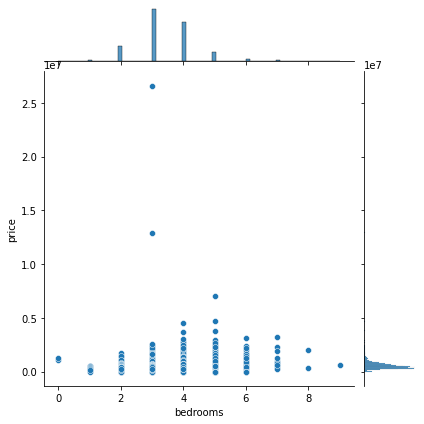

In [26]:
#Jointplot gives us the probability distribution as well
sns.jointplot(x=df['bedrooms'],y=df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

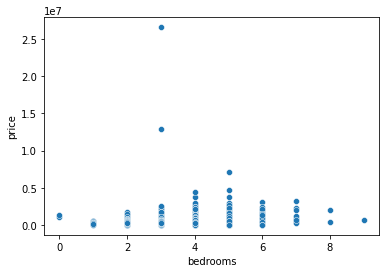

In [27]:
#data=df is because we have the data in df data frame
sns.scatterplot(x=df['bedrooms'],y=df['price'],data=df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

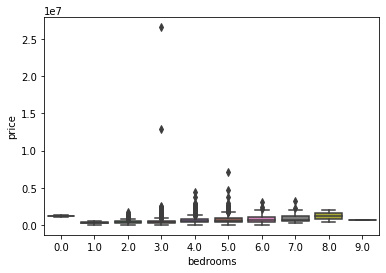

In [28]:
#One of the best plots to identify the outliers
sns.boxplot(x=df['bedrooms'],y=df['price'],data=df)

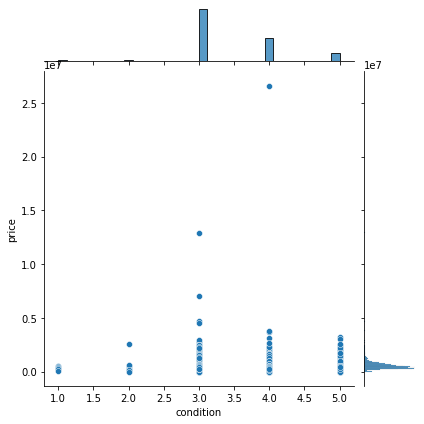

In [29]:
sns.jointplot(x=df['condition'],y=df['price'],data=df)

<AxesSubplot:xlabel='condition', ylabel='price'>

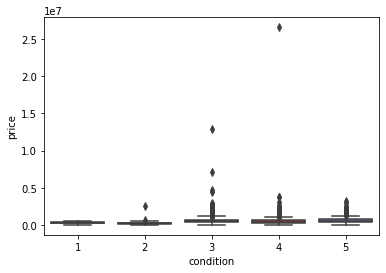

In [30]:
sns.boxplot(x=df['condition'],y=df['price'],data=df)

In [31]:
#crosstab gives us the details between any number of columns, irrespective of its data type, like jointplot gives in a graphical format. Usually we take
#crosstab between 2 columns as it is easier to comprehend
pd.crosstab(df['condition'],[df['bedrooms'],df['bathrooms']])

bedrooms   0.0  1.0                                2.0       ...  7.0       \
bathrooms 0.00 0.75 1.00 1.25 1.50 1.75 2.00 2.25 0.75 1.00  ... 3.50 4.00   
condition                                                    ...             
1            0    0    0    0    0    0    0    0    0    3  ...    0    0   
2            0    1    3    0    0    0    0    0    0    8  ...    0    0   
3            2    5   15    1    2    0    0    1    2  167  ...    2    2   
4            0    0    3    0    1    1    1    0    4  114  ...    0    0   
5            0    2    2    0    0    0    0    0    1   28  ...    0    0   

bedrooms                            8.0       9.0  
bathrooms 4.25 4.50 5.50 5.75 8.00 2.75 3.50 4.50  
condition                                          
1            0    0    0    0    0    0    0    0  
2            0    0    0    0    0    0    0    0  
3            1    1    1    1    1    1    0    1  
4            0    0    0    0    0    0    0    0  
5            0    2    0    0    0    0    1    0  

[5 rows x 102 columns]

In [32]:
#Gives us the unique number of cities
df['city'].nunique()

44

In [33]:
#Groups the records by cities, telling how many records exist for that particular city
df.groupby(df['city']).size()

city
Algona                    5
Auburn                  176
Beaux Arts Village        1
Bellevue                286
Black Diamond             9
Bothell                  33
Burien                   74
Carnation                22
Clyde Hill               11
Covington                43
Des Moines               58
Duvall                   42
Enumclaw                 28
Fall City                11
Federal Way             148
Inglewood-Finn Hill       1
Issaquah                187
Kenmore                  66
Kent                    185
Kirkland                187
Lake Forest Park         36
Maple Valley             96
Medina                   11
Mercer Island            86
Milton                    2
Newcastle                33
Normandy Park            18
North Bend               50
Pacific                   6
Preston                   2
Ravensdale                7
Redmond                 235
Renton                  293
Sammamish               175
SeaTac                   29
Seattle        

In [34]:
#We divide the columns to be used and the one to be predicted into X and Y
#Here, drop the columns which are of no use, that is highly co-related, or redundant, and change the string (object) type columns into numeric data by encoding
X=df_1[[ 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot',
       'floors', 'waterfront', 'view', 'condition' 
       ]]
    
y=df_1['price']

In [35]:
#Splitting the data into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [36]:
#Checking the shape of the data
X_train.shape

(3220, 8)

In [37]:
#Creating an instance of the LinearRegression() function present in the SKLearn Library
regr = LinearRegression()

In [38]:
#Training the model by fitting the training data into it
model=regr.fit(X_train, y_train)

In [39]:
#To print the model accuracy
print(model.score(X_test, y_test))

0.05835510849068404


In [40]:
#Data is sent for prediction, based on the columns it is trained on
model.predict([[3, 2, 1234, 5675,3, 0, 0, 7, 3200,200, 1989, 2005]])

ValueError: X has 12 features, but LinearRegression is expecting 8 features as input.

In [41]:
#Predicting all the prices for the X_test data
y_pred=model.predict(X_test)

In [42]:
y_pred

array([ 348662.97932299,  403023.12709132, 1029150.79552801, ...,
        341529.22417348,  407607.83173005,  548911.92535446])

In [43]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition
3683,3.0,2.50,1460,1613,2.0,0,0,3
4411,5.0,2.25,2000,7900,1.0,0,0,4
2584,3.0,3.25,2940,5432,3.0,0,3,4
69,3.0,2.50,2200,7350,1.0,0,0,5
1844,3.0,2.50,1720,8755,1.0,0,0,3
...,...,...,...,...,...,...,...,...
3437,6.0,3.50,3600,6875,2.0,0,0,3
3340,4.0,2.50,3920,12415,2.0,0,0,3
1289,3.0,2.00,1490,8371,1.5,0,0,3
449,3.0,1.75,1780,120661,1.0,0,0,4


In [44]:
y_test

3683     544000.0
4411          0.0
2584    1712500.0
69       365000.0
1844     275000.0
          ...    
3437     620000.0
3340     770000.0
1289     255000.0
449      336900.0
3774     620000.0
Name: price, Length: 1380, dtype: float64

In [45]:
y_pred

array([ 348662.97932299,  403023.12709132, 1029150.79552801, ...,
        341529.22417348,  407607.83173005,  548911.92535446])

In [46]:
#y_pred is a numpy array, so we convert it into a data frame to join it with the X_test data frame
pred_price=pd.DataFrame(y_pred)
pred_price.columns=['pred_price']

In [47]:
#We reset the index of the X_test data frame, so that it can be joined to the pred_price data frame, which has the index starting from 0
X_test=X_test.reset_index(drop=True)

In [48]:
#Merging the pred_price and X_test throught the index of both the tables
pd.merge(X_test,pred_price,right_index=True,left_index=True)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,pred_price
0,3.0,2.50,1460,1613,2.0,0,0,3,3.486630e+05
1,5.0,2.25,2000,7900,1.0,0,0,4,4.030231e+05
2,3.0,3.25,2940,5432,3.0,0,3,4,1.029151e+06
3,3.0,2.50,2200,7350,1.0,0,0,5,6.390872e+05
4,3.0,2.50,1720,8755,1.0,0,0,3,3.800026e+05
...,...,...,...,...,...,...,...,...,...
1375,6.0,3.50,3600,6875,2.0,0,0,3,7.791236e+05
1376,4.0,2.50,3920,12415,2.0,0,0,3,1.010953e+06
1377,3.0,2.00,1490,8371,1.5,0,0,3,3.415292e+05
1378,3.0,1.75,1780,120661,1.0,0,0,4,4.076078e+05


In [49]:
pearsonr(df['price'],df['sqft_living'])

PearsonRResult(statistic=0.43041002543262813, pvalue=7.549895925374248e-207)

In [50]:
pearsonr(df['price'],df['sqft_above'])

PearsonRResult(statistic=0.3675696016004258, pvalue=3.808299028732256e-147)

In [84]:
pd.crosstab(df['city'],df['price'])

KeyError: 'city'

<AxesSubplot:xlabel='city', ylabel='price'>

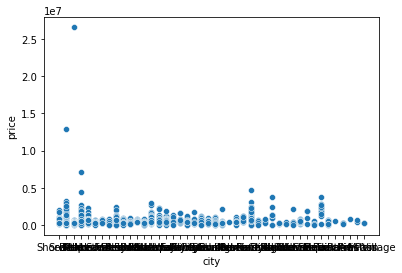

In [52]:
sns.scatterplot(x=df['city'],y=df['price'])

In [86]:
type(df['city'].unique())

numpy.ndarray

In [54]:
df[df['city']=='Seattle']['price'].nunique()

804

In [55]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,list_year,latest_year
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2014.0,1205.391739
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,0.0,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,2014.0,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,2014.0,15.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2014.0,2014.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,2014.0,2014.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,2014.0,2014.000000


In [56]:
df[df['city']=='Seattle'].nunique()

date               68
price             804
bedrooms           10
bathrooms          19
sqft_living       349
sqft_lot          954
floors              6
waterfront          2
view                5
condition           5
sqft_above        287
sqft_basement     158
yr_built          113
yr_renovated       55
street           1543
city                1
statezip           25
country             1
list_year           1
latest_year        55
dtype: int64

In [57]:
df_city = df[['city']]
df_city.head()

,city
0,Shoreline
1,Seattle
2,Kent
3,Bellevue
4,Redmond


In [58]:
one_hot_encoder = OneHotEncoder()
df_city_encoded = one_hot_encoder.fit_transform(df_city)
df_city_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
city_list=list(df['city'].unique())

In [89]:
city_encoded=pd.DataFrame(df_city_encoded.toarray(),columns=city_list)
#OR
city_encoded=pd.DataFrame(df_city_encoded.toarray(),columns=df['city'].unique())

In [90]:
city_encoded

,Shoreline,Seattle,Kent,Bellevue,Redmond,Maple Valley,North Bend,Lake Forest Park,Sammamish,Auburn,...,Vashon,Yarrow Point,SeaTac,Medina,Enumclaw,Snoqualmie Pass,Pacific,Beaux Arts Village,Preston,Milton
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
city_encoded.shape

(4600, 44)

In [62]:
df.shape

(4600, 20)

In [63]:
df.drop(columns='city',axis=1,inplace=True)

In [64]:
df.shape

(4600, 19)

In [65]:
df_final=pd.merge(df,city_encoded,right_index=True,left_index=True)

In [66]:
df_final.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'statezip',
       'country', 'list_year', 'latest_year', 'Shoreline', 'Seattle', 'Kent',
       'Bellevue', 'Redmond', 'Maple Valley', 'North Bend', 'Lake Forest Park',
       'Sammamish', 'Auburn', 'Des Moines', 'Bothell', 'Federal Way',
       'Kirkland', 'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City',
       'Renton', 'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina', 'Enumclaw',
       'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village', 'Preston',
       'Milton'],
      dtype='object')

In [67]:
X = df_final[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'Shoreline', 'Seattle', 'Kent',
       'Bellevue', 'Redmond', 'Maple Valley', 'North Bend', 'Lake Forest Park',
       'Sammamish', 'Auburn', 'Des Moines', 'Bothell', 'Federal Way',
       'Kirkland', 'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City',
       'Renton', 'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina', 'Enumclaw',
       'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village', 'Preston',
       'Milton']]
y=df_final['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=42)

In [69]:
model = regr.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.07667444893277298


In [70]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'statezip',
       'country', 'list_year', 'latest_year'],
      dtype='object')

In [71]:
df['statezip'].nunique()

77

In [72]:
df['date'].nunique()

70

In [73]:
df['yr_built'].nunique()

115

In [74]:
df['yr_renovated'].nunique()

60

In [75]:
df['country'].nunique()

1

In [76]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,Vashon,Yarrow Point,SeaTac,Medina,Enumclaw,Snoqualmie Pass,Pacific,Beaux Arts Village,Preston,Milton
bedrooms,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,...,-0.010957,-0.183346,-0.016767,-0.020639,0.024331,-0.006505,-0.029091,-0.056293,0.027427,0.011334
bathrooms,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,...,-0.044382,-0.182717,-0.076141,-0.016108,0.075567,0.011086,-0.050515,-0.031239,0.044429,-0.008406
sqft_living,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,...,-0.038112,-0.232573,-0.062733,-0.020760,0.074974,-0.000602,-0.035822,-0.020647,0.087066,0.010205
sqft_lot,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,...,-0.007509,-0.191384,-0.026563,0.015086,0.009645,-0.001845,-0.007454,0.152969,0.122839,-0.001216
floors,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,...,-0.047713,0.025136,-0.090094,0.007338,0.084019,0.013368,-0.019646,0.000766,0.010639,0.026744
waterfront,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,...,-0.006771,-0.039557,-0.014090,-0.002172,-0.010643,-0.001253,-0.006771,0.221042,-0.013612,-0.002508
view,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,...,-0.006983,0.052671,-0.002771,-0.007899,0.006602,-0.004559,-0.017570,0.102412,-0.044144,0.009830
condition,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,...,-0.028800,0.076079,0.046639,-0.004467,-0.078319,-0.009837,-0.049080,0.015817,-0.016347,0.012994
sqft_above,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,...,-0.036218,-0.325732,-0.064932,-0.013945,0.113295,-0.005427,-0.037820,-0.007024,0.107353,0.022081
sqft_basement,0.334165,0.298020,0.447206,0.034842,-0.255510,0.097501,0.321602,0.200632,-0.038723,1.000000,...,-0.011815,0.122420,-0.009571,-0.017179,-0.054862,0.008831,-0.004086,-0.029801,-0.018732,-0.019839


In [77]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'statezip',
       'country', 'list_year', 'latest_year'],
      dtype='object')

In [78]:
df_num = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']]

In [79]:
df_num.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426
